In [1]:
# import standart module
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import scikit learn module 
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso

In [3]:
# import xgboost using this algortm for boosting prediction
import xgboost as xgb

In [4]:
# import scipy funtion
from scipy import stats
from scipy.stats import norm

In [5]:
plt.rcParams['figure.figsize'] = (10.0, 8.0)

In [7]:
# load dataset
train = pd.read_excel('dataset-and-model/train.xls')
test = pd.read_excel('dataset-and-model/test.xls')

In [8]:
# show dataset train
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [9]:
#show dataset test 
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [10]:
# show infomation on dataset train
train.shape[0], train.shape[1]

(1460, 81)

In [11]:
# show information on dataset test 
test.shape[0],train.shape[1]

(1459, 81)

In [14]:
#show statistic information on SalePrice
train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [15]:
# show all feature in train
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [16]:
#show all feature on dataset test
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [17]:
# check null column on train dataset
train.columns[train.isnull().any()]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [21]:
# counting percentage lost column 
missing = train.isnull().sum()/len(train)
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing

Electrical      0.000685
MasVnrType      0.005479
MasVnrArea      0.005479
BsmtQual        0.025342
BsmtCond        0.025342
BsmtFinType1    0.025342
BsmtExposure    0.026027
BsmtFinType2    0.026027
GarageCond      0.055479
GarageQual      0.055479
GarageFinish    0.055479
GarageType      0.055479
GarageYrBlt     0.055479
LotFrontage     0.177397
FireplaceQu     0.472603
Fence           0.807534
Alley           0.937671
MiscFeature     0.963014
PoolQC          0.995205
dtype: float64

In [22]:
# show missing data
missing = missing.to_frame()
missing.columns = [ 'count']
missing.index.names = ['Name']
missing['Name'] = missing.index

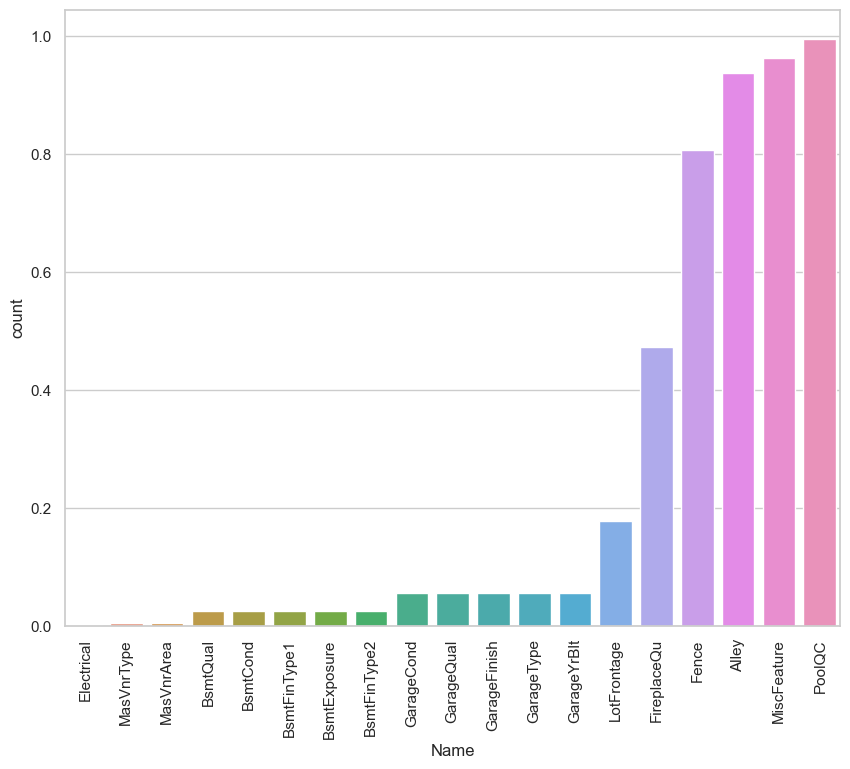

In [24]:
#ploting missing data
from tkinter.ttk import Style


sns.set(style = 'whitegrid', color_codes = True)
sns.barplot(x = 'Name', y = 'count', data = missing)
plt.xticks(rotation = 90)
plt.show()

In [26]:
# show Skewness
train['SalePrice'].skew()

1.8828757597682129

C:\Users\HP-GAMING\AppData\Local\Temp\ipykernel_20108\492103610.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['SalePrice'])


<AxesSubplot: xlabel='SalePrice', ylabel='Density'>

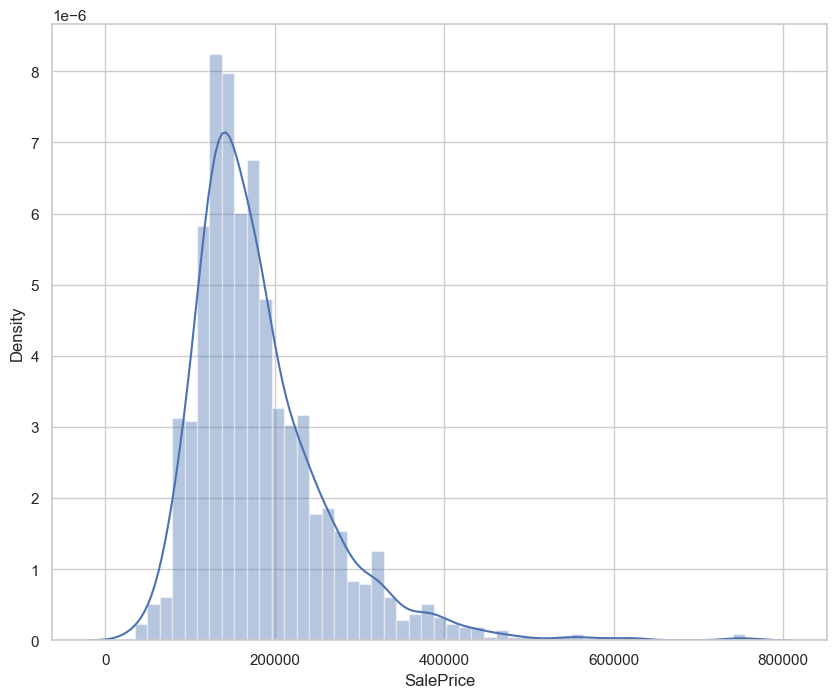

In [27]:
# show grafic of skewness
sns.distplot(train['SalePrice'])


Skewness is 0.12133506220520406


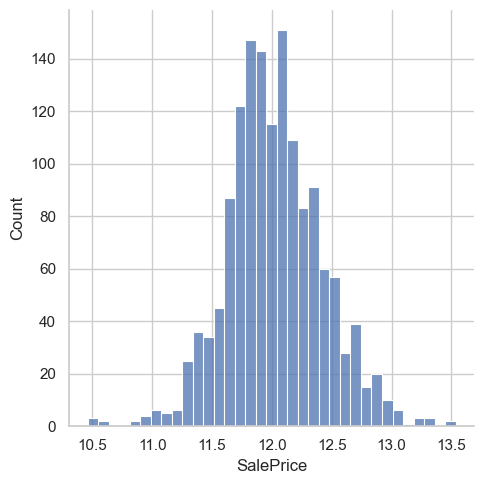

In [28]:
# transformation skewness
target = np.log(train['SalePrice'])
print('Skewness is', target.skew())
sns.displot(target)

In [30]:
# spliting variabel numeric with categorical 

numeric_data = train.select_dtypes(include=[np.number])
cat_data =  train.select_dtypes(exclude=[np.number])
numeric_data.shape[1]


38

In [31]:
cat_data.shape[1]

43

In [32]:
# eraser id colom 
del numeric_data['Id']
numeric_data.shape[1]

37

<AxesSubplot: >

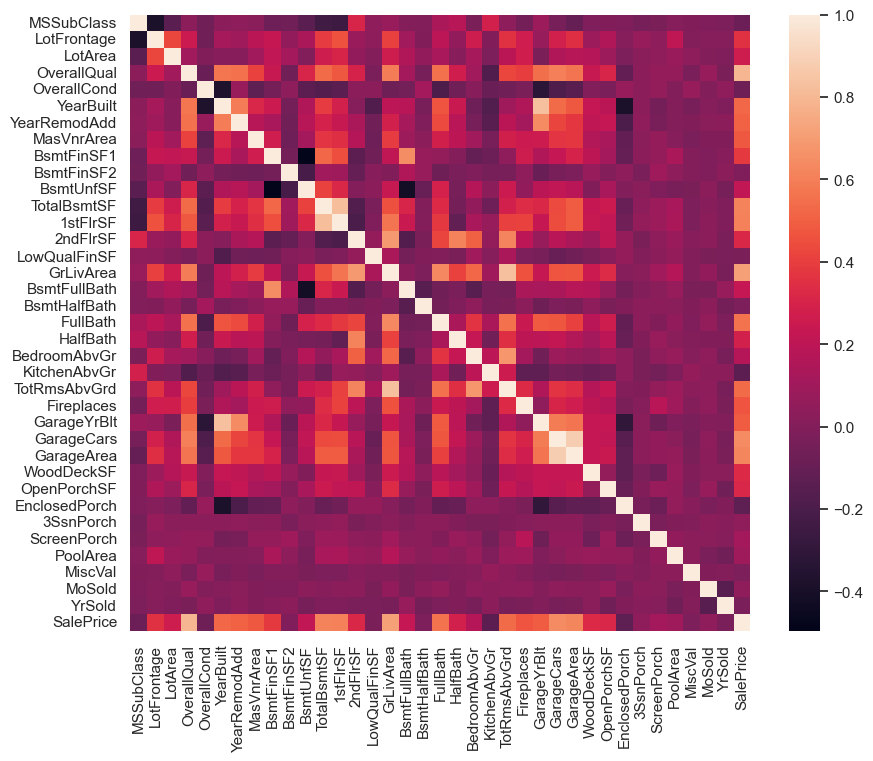

In [34]:
#show correlation 
corr =numeric_data.corr()
sns.heatmap(corr)

In [35]:
# show 15 highet colleration
print(corr['SalePrice'].sort_values(ascending=False)[:15], '\n')


SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
BsmtFinSF1      0.386420
Name: SalePrice, dtype: float64 



In [37]:
# show 5 lowest colleration
print(corr['SalePrice'].sort_values(ascending=False)[-5:])

YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


             SalePrice
OverallQual           
1                50150
2                60000
3                86250
4               108000
5               133000
6               160000
7               200141
8               269750
9               345000
10              432390


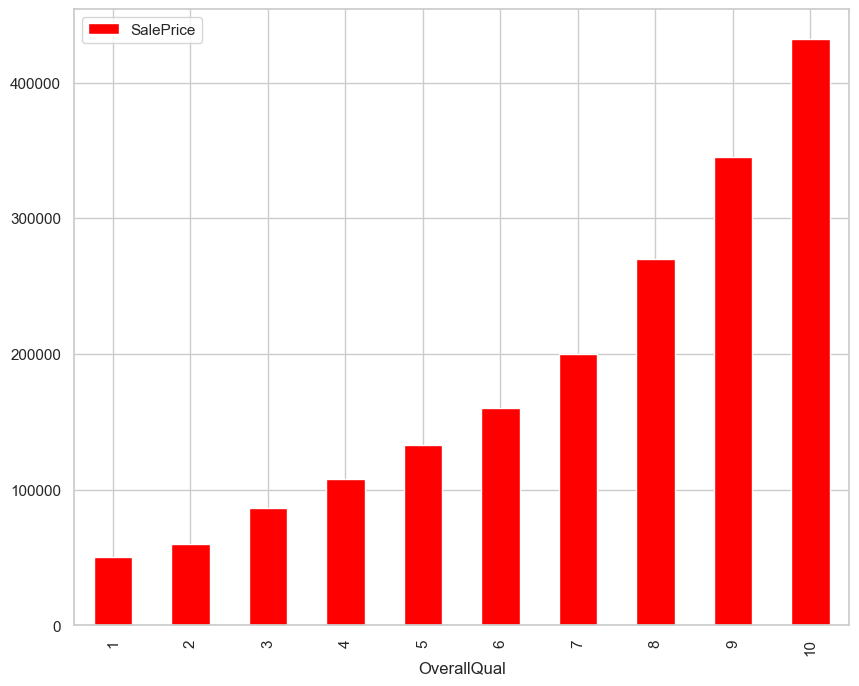

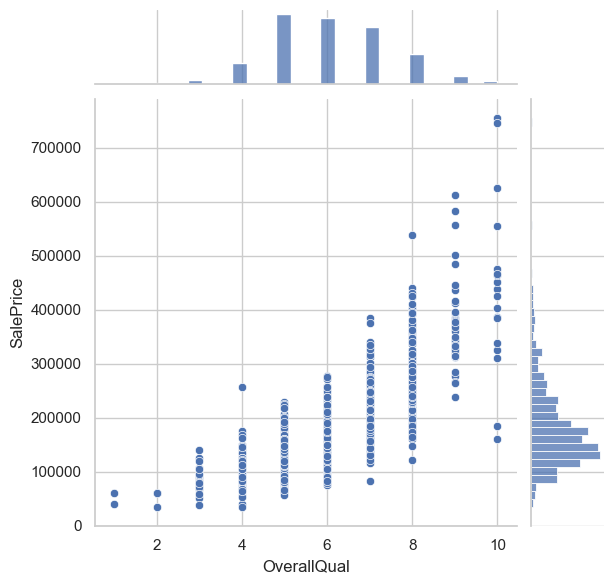

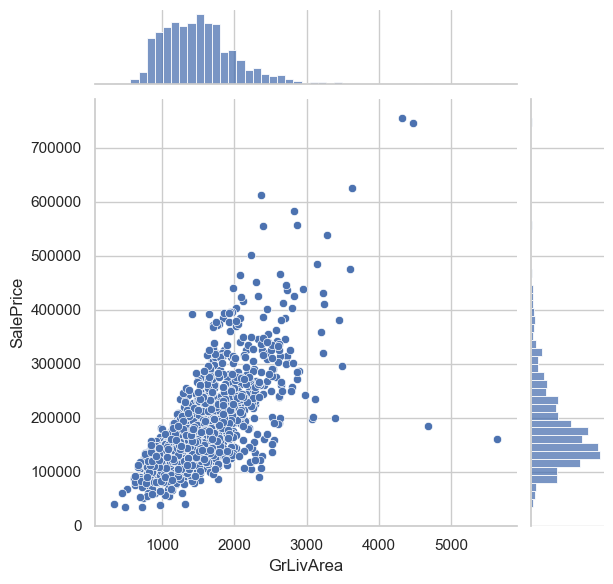

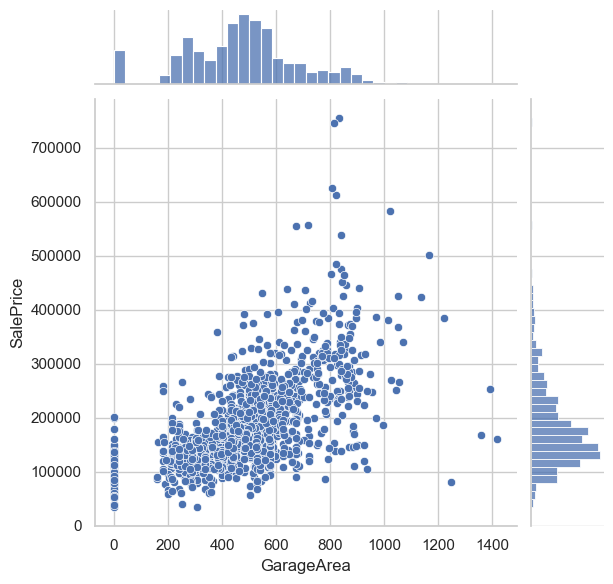

In [39]:
# visualisation the pivot table 
from turtle import color


train['OverallQual'].unique()
pivot =train.pivot_table(index='OverallQual', values='SalePrice', aggfunc=np.median)
print(pivot)
pivot.plot(kind='bar',color='red')
sns.jointplot(x=train['OverallQual'], y=train['SalePrice'])
sns.jointplot(x=train['GrLivArea'], y=train['SalePrice'])
sns.jointplot(x=train['GarageArea'],y=train['SalePrice'])

In [40]:
#Mengamati apakah ada kolom kososng pada variable numeric
numeric_data.columns[numeric_data.isnull().any()]

numeric_data.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [41]:
#Menampilkan informasi categorical variable
print(cat_data.describe())
cat_data.columns[cat_data.isnull().any()]

       MSZoning Street Alley LotShape LandContour Utilities LotConfig  \
count      1460   1460    91     1460        1460      1460      1460   
unique        5      2     2        4           4         2         5   
top          RL   Pave  Grvl      Reg         Lvl    AllPub    Inside   
freq       1151   1454    50      925        1311      1459      1052   

       LandSlope Neighborhood Condition1  ... GarageType GarageFinish  \
count       1460         1460       1460  ...       1379         1379   
unique         3           25          9  ...          6            3   
top          Gtl        NAmes       Norm  ...     Attchd          Unf   
freq        1382          225       1260  ...        870          605   

       GarageQual GarageCond PavedDrive PoolQC  Fence MiscFeature SaleType  \
count        1379       1379       1460      7    281          54     1460   
unique          5          5          3      3      4           4        9   
top            TA         TA      

Index(['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC',
       'Fence', 'MiscFeature'],
      dtype='object')

<AxesSubplot: xlabel='SaleCondition'>

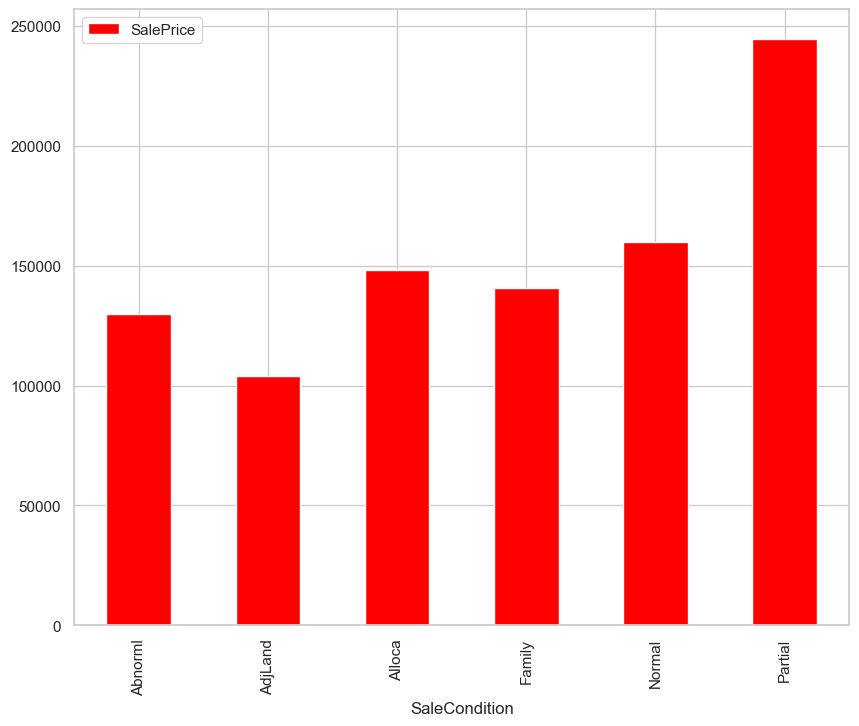

In [42]:
#Mnemapilkan median dari SaleCondition
sp_pivot = train.pivot_table(index='SaleCondition', values='SalePrice', aggfunc=np.median)
sp_pivot
sp_pivot.plot(kind='bar',color='red')

c:\Users\HP-GAMING\AppData\Local\Programs\Python\Python38\lib\site-packages\scipy\stats\_stats_py.py:3869: DegenerateDataWarning: at least one input has length 0
  warnings.warn(stats.DegenerateDataWarning('at least one input '


<module 'matplotlib.pyplot' from 'c:\\Users\\HP-GAMING\\AppData\\Local\\Programs\\Python\\Python38\\lib\\site-packages\\matplotlib\\pyplot.py'>

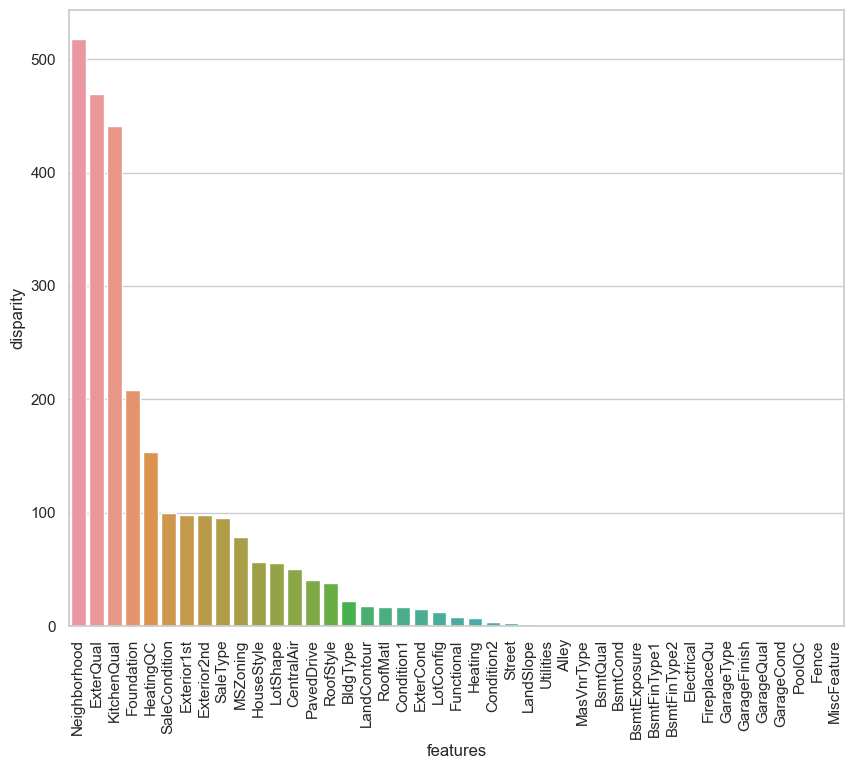

In [43]:

#Mendefinisikan p-value untuk ANOVA test
cat = [f for f in train.columns if train.dtypes[f] == 'object']
def anova(frame):
    anv = pd.DataFrame()
    anv['features'] = cat
    pvals = []
    for c in cat:
           samples = []
           for cls in frame[c].unique():
                  s = frame[frame[c] == cls]['SalePrice'].values
                  samples.append(s)
           pval = stats.f_oneway(*samples)[1]
           pvals.append(pval)
    anv['pval'] = pvals
    return anv.sort_values('pval')

cat_data['SalePrice'] = train.SalePrice.values
k = anova(cat_data)
k['disparity'] = np.log(1./k['pval'].values)
sns.barplot(data=k, x = 'features', y='disparity')
plt.xticks(rotation=90)
plt


c:\Users\HP-GAMING\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
c:\Users\HP-GAMING\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
c:\Users\HP-GAMING\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in

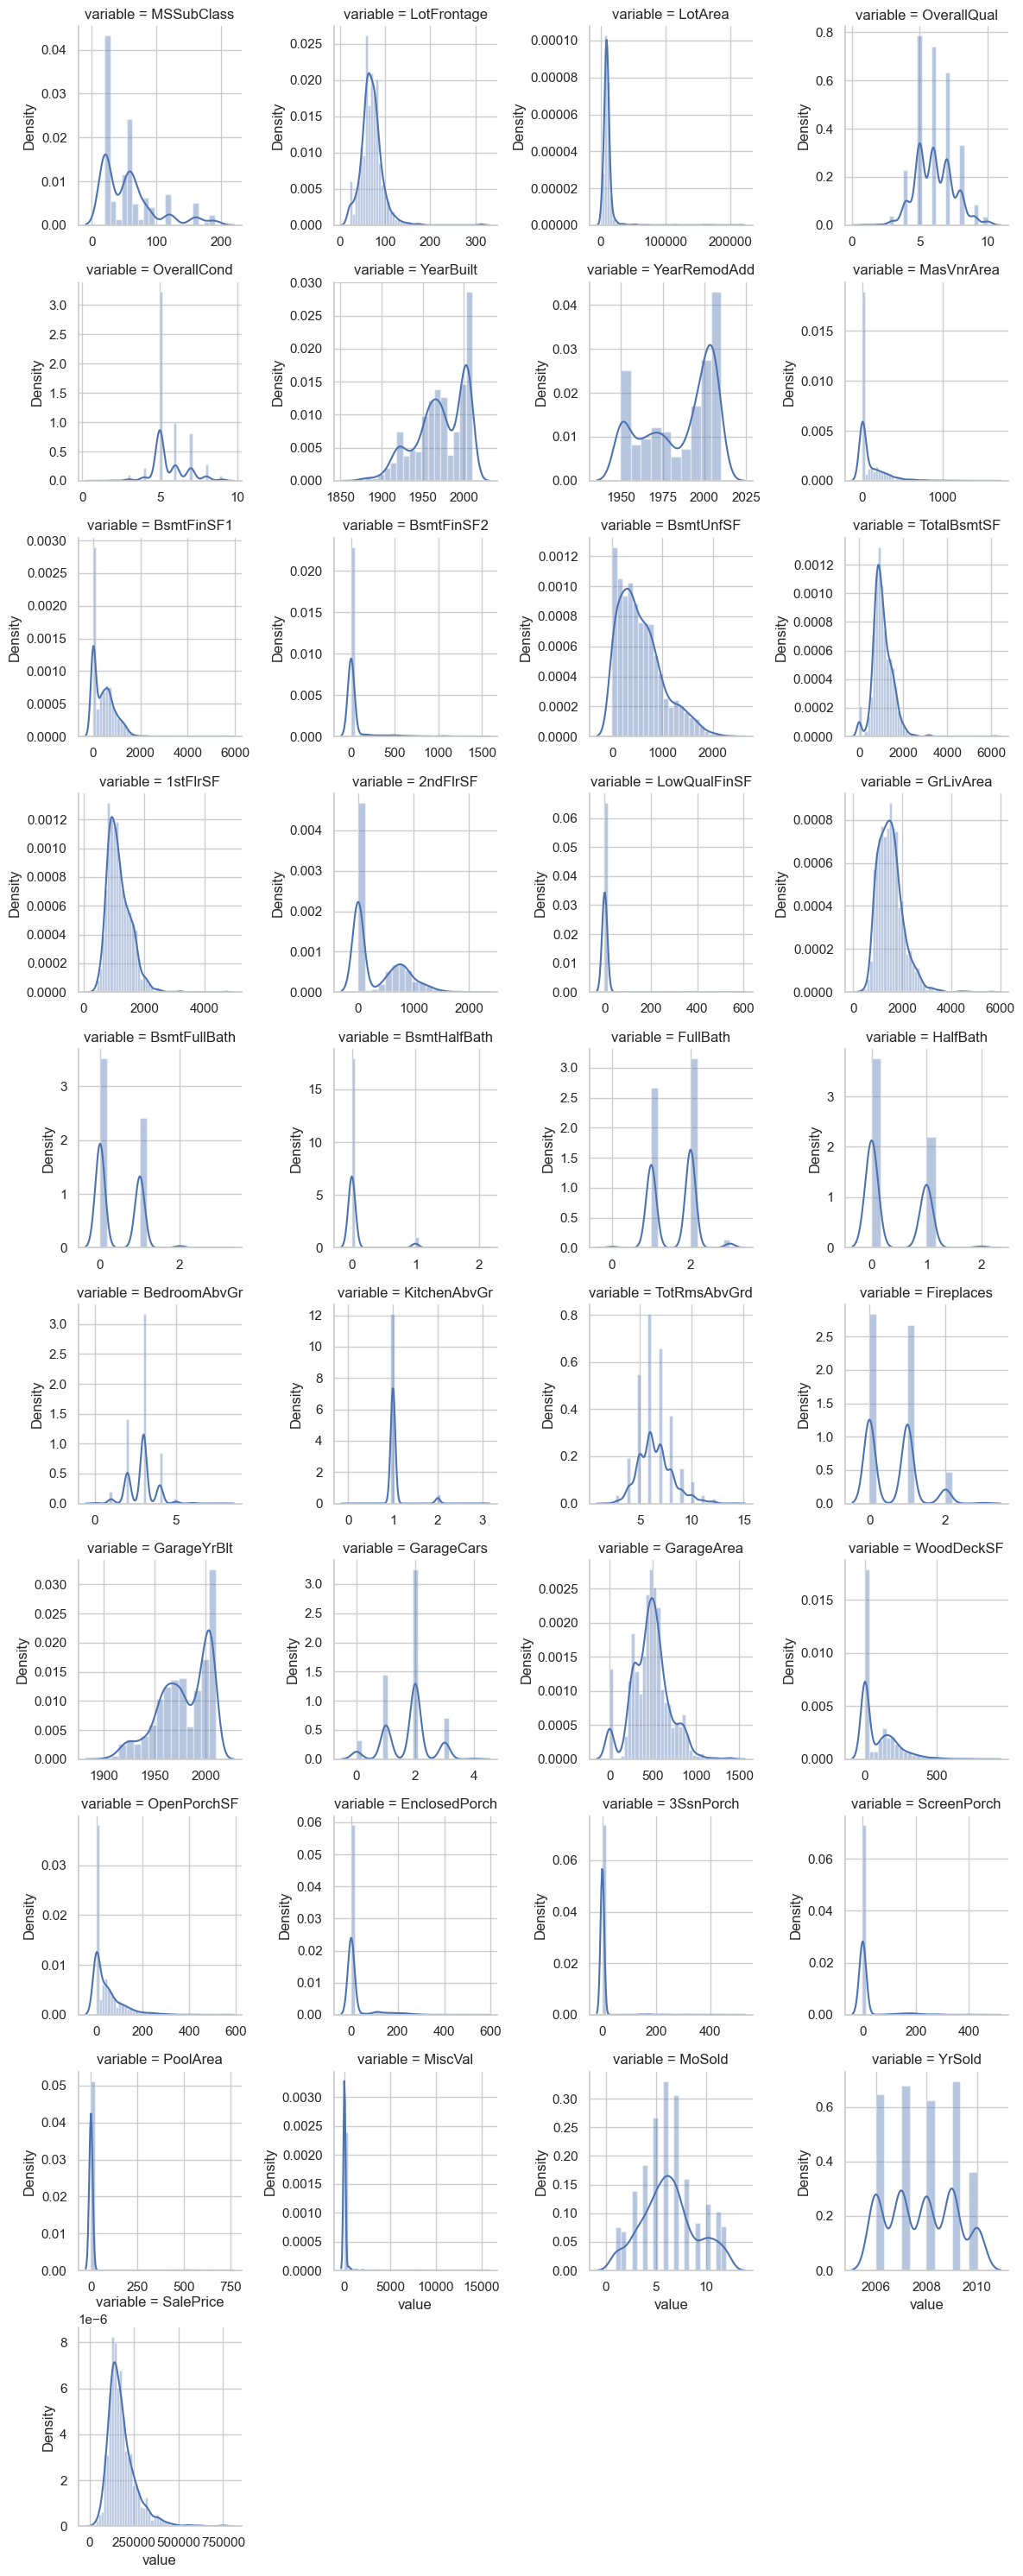

In [44]:
#Menampilkan histogram
#create numeric plots
num = [f for f in train.columns if train.dtypes[f] != 'object']
num.remove('Id')
nd = pd.melt(train, value_vars = num)
n1 = sns.FacetGrid (nd, col='variable', col_wrap=4, sharex=False, sharey = False)
n1 = n1.map(sns.distplot, 'value')
n1

In [48]:
#Hapus aoulier pada GrLivArea untuk data di atas 4000
train.drop(train[train['GrLivArea'] > 4000].index, inplace=True)
train.shape

(1456, 81)

In [49]:
#Hapus aoulier pada Garage untuk data di atas 1200
train.drop(train[train['GarageArea'] > 1200].index, inplace=True)
train.shape

(1452, 81)

In [50]:
null=pd.DataFrame(train.isnull().sum().sort_values(ascending=False)[:25])
print (null)

                 0
PoolQC        1447
MiscFeature   1399
Alley         1361
Fence         1172
FireplaceQu    689
LotFrontage    258
GarageYrBlt     81
GarageCond      81
GarageType      81
GarageFinish    81
GarageQual      81
BsmtFinType2    38
BsmtExposure    38
BsmtQual        37
BsmtCond        37
BsmtFinType1    37
MasVnrArea       8
MasVnrType       8
Electrical       1
Id               0
Functional       0
Fireplaces       0
KitchenQual      0
KitchenAbvGr     0
BedroomAbvGr     0


In [51]:
print ("Unique values are:", train.MiscFeature.unique())
data=train.select_dtypes(include=[np.number]).interpolate().dropna()

Unique values are: [nan 'Shed' 'Gar2' 'Othr' 'TenC']


In [52]:
print (sum(data.isnull().sum()))
categoricals=train.select_dtypes(exclude=[np.number])
categoricals.describe()

0


,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1452,1452,91,1452,1452,1452,1452,1452,1452,1452,...,1371,1371,1371,1371,1452,5,280,53,1452,1452
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Fa,MnPrv,Shed,WD,Normal
freq,1144,1447,50,921,1307,1451,1047,1375,225,1255,...,865,605,1303,1318,1332,2,156,48,1264,1195


In [53]:

train['enc_street'] = pd.get_dummies(train.Street, drop_first=True)
test['enc_street'] = pd.get_dummies(train.Street, drop_first=True)

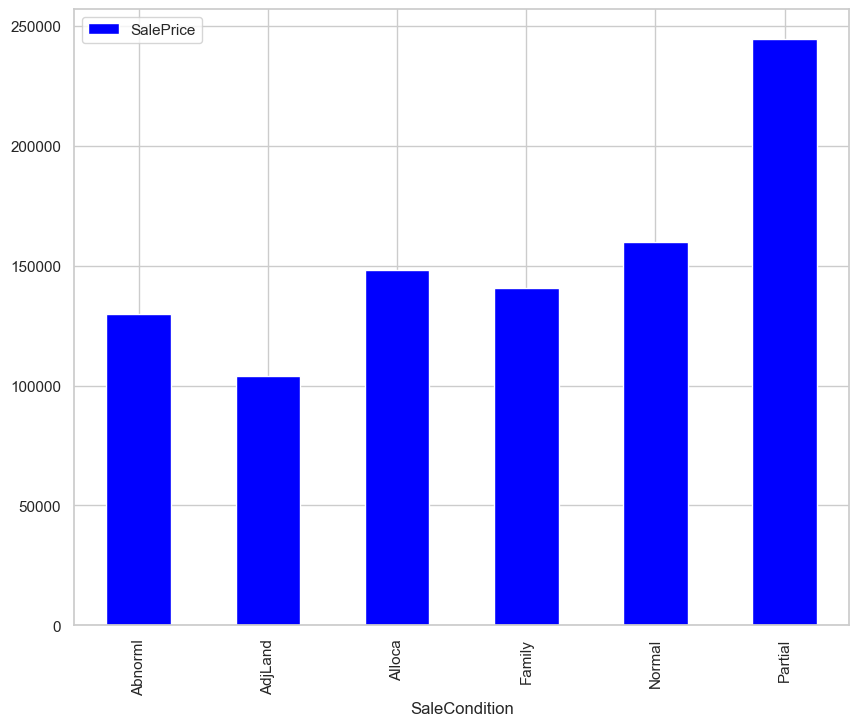

In [54]:
condition_pivot=train.pivot_table(index="SaleCondition",values="SalePrice",aggfunc=np.median)
condition_pivot.plot(kind="bar",color="blue")
plt.show()

In [55]:
def encode(x): return 1 if x == 'Partial' else 0
train['enc_condition'] = train.SaleCondition.apply(encode)
test['enc_condition'] = test.SaleCondition.apply(encode)

['Reg' 'IR1' 'IR2' 'IR3']


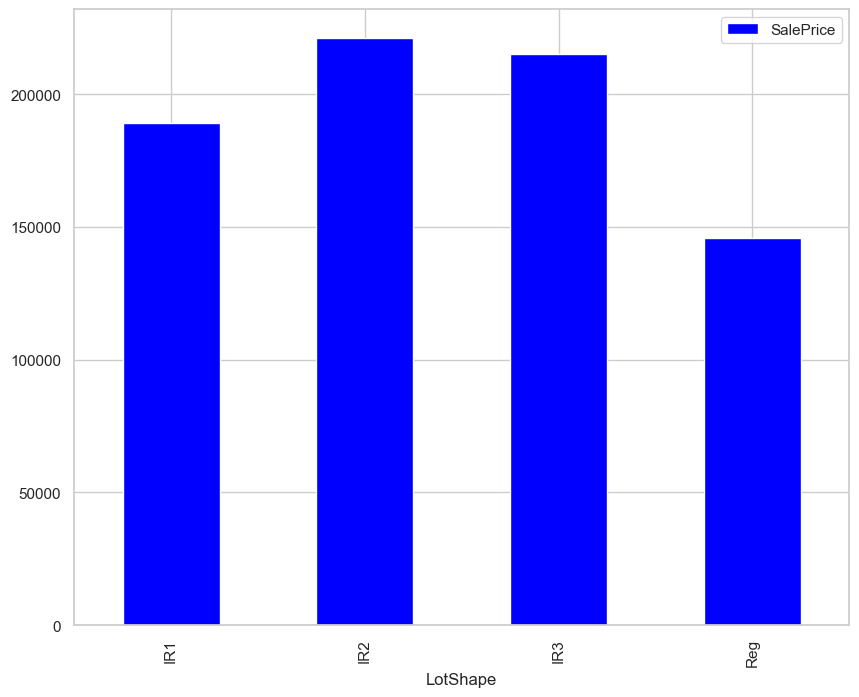

In [56]:
print (train.LotShape.unique())
pt=train.pivot_table(index="LotShape",values="SalePrice",aggfunc=np.median)
pt.plot(kind="bar",color="blue")
plt.show()

In [57]:
LotShape_D=pd.get_dummies(train.LotShape)
train=pd.concat([train,LotShape_D],axis=1)
test=pd.concat([test,LotShape_D],axis=1)


In [58]:
y=np.log(train.SalePrice)
x=data.drop(["SalePrice","Id"], axis=1)
X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=.33)


Training - R squared is: 
 0.8823181349282765
Training - RMSE is: 
 0.018185726265640408


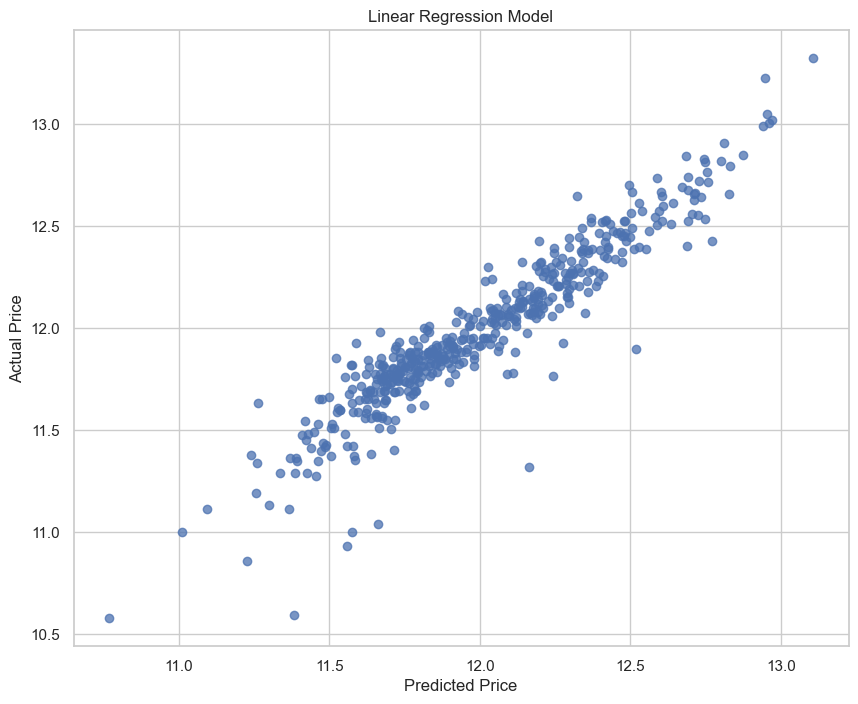

In [59]:
#A. Linear Regression
lr=linear_model.LinearRegression()
model=lr.fit(X_train,y_train)
print("Training - R squared is: \n", model.score(X_test,y_test))
predictions=model.predict(X_test)
print("Training - RMSE is: \n", mean_squared_error(y_test,predictions))
actual_values=y_test
plt.scatter(predictions,actual_values,alpha=.75,color="b")
plt.xlabel("Predicted Price")
plt.ylabel("Actual Price")
plt.title("Linear Regression Model")
plt.show()


Training - R squared is: 
 0.8823189394883284
Training - RMSE is: 
 0.01818560193459874


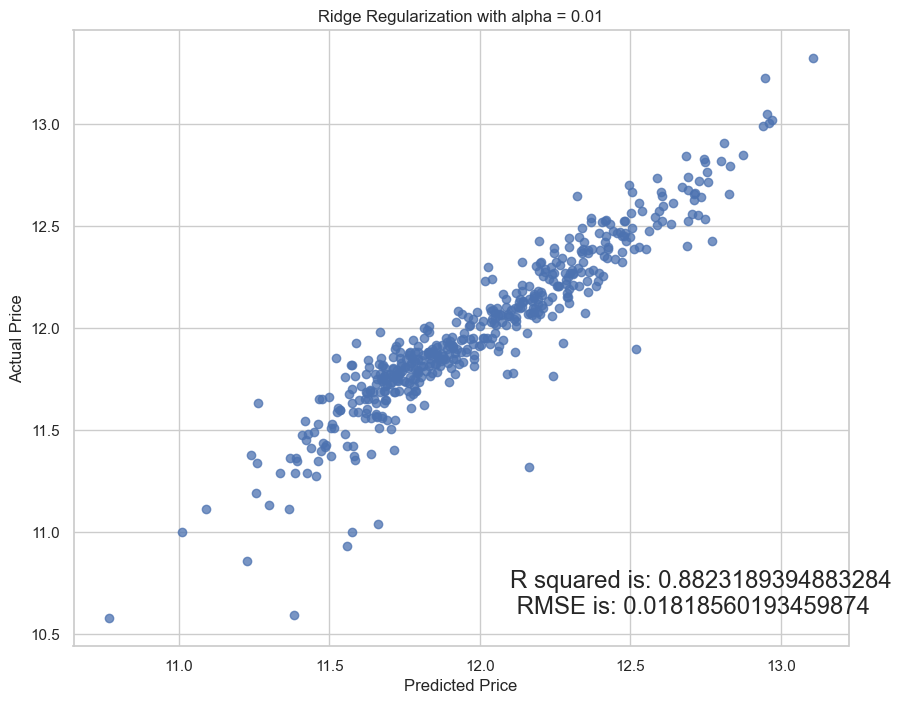

Training - R squared is: 
 0.8823261275219995
Training - RMSE is: 
 0.018184491146520647


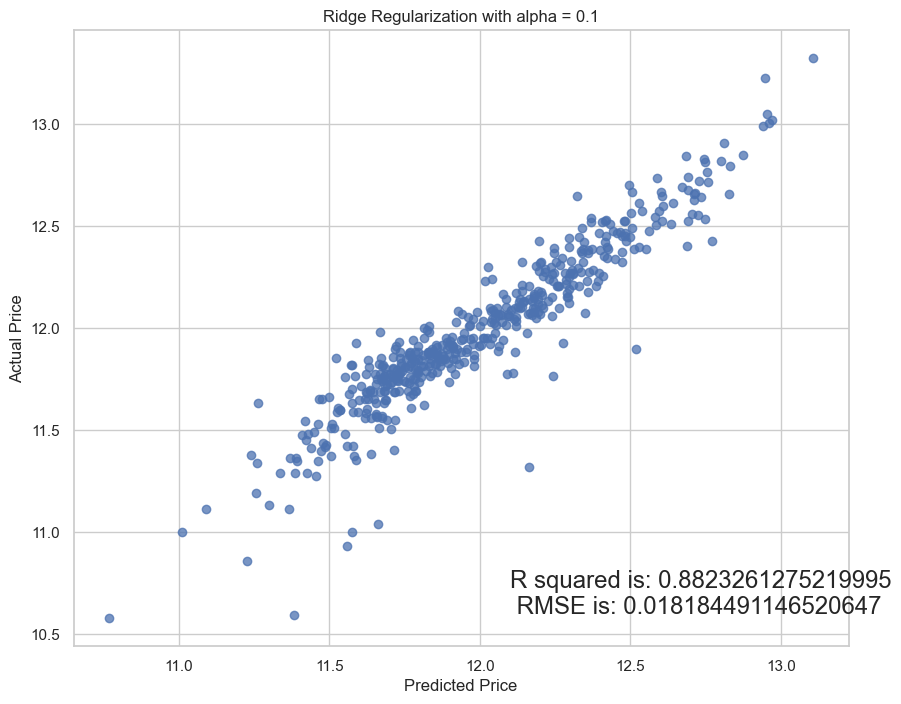

Training - R squared is: 
 0.882393038015844
Training - RMSE is: 
 0.018174151270239677


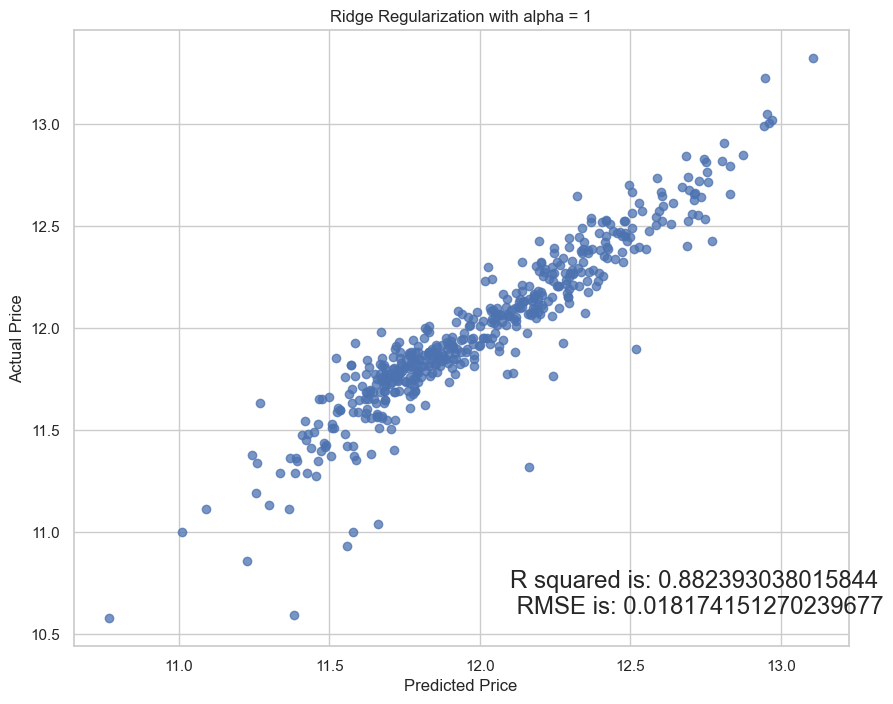

Training - R squared is: 
 0.882745854083682
Training - RMSE is: 
 0.01811962956098642


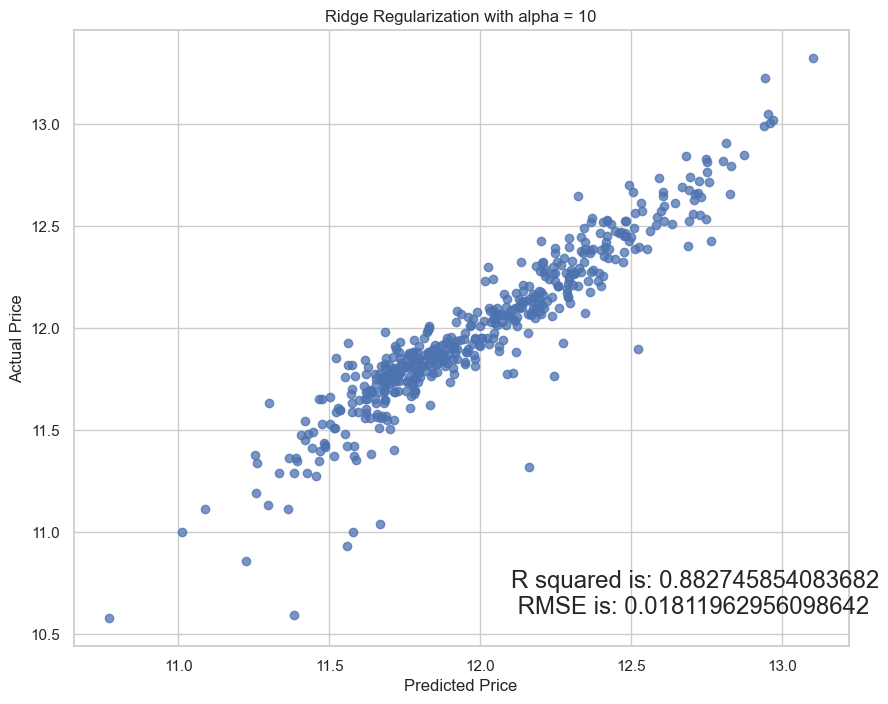

Training - R squared is: 
 0.8815628697206308
Training - RMSE is: 
 0.018302439629384545


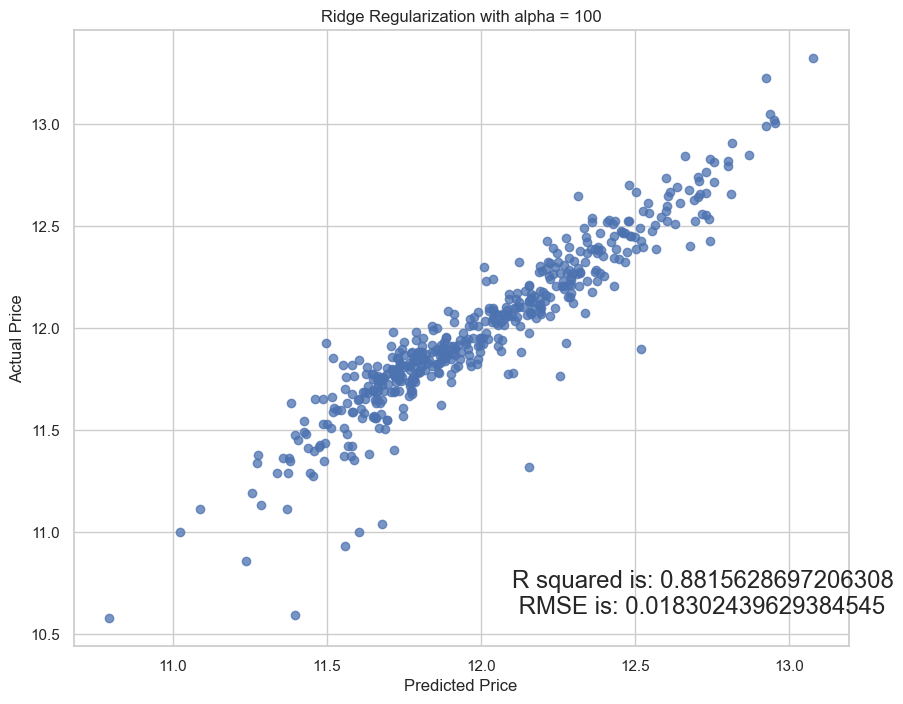

In [65]:
#B. Ridge Regularization
for i in range(-2,3):
    alpha=10**i
    rm=linear_model.Ridge(alpha=alpha)
    ridge_model= rm.fit(X_train,y_train)
    print("Training - R squared is: \n", ridge_model.score(X_test,y_test))
    preds_ridge=ridge_model.predict(X_test)
    print("Training - RMSE is: \n", mean_squared_error(y_test,preds_ridge))
    plt.scatter(preds_ridge,actual_values,alpha=.75,color="b")
    plt.xlabel("Predicted Price")
    plt.ylabel("Actual Price")
    plt.title("Ridge Regularization with alpha = {}".format(alpha))
    overlay="R squared is: {}\n RMSE is: {}".format(ridge_model.score(X_test,y_test),mean_squared_error(y_test,preds_ridge))
    plt.annotate(text=overlay,xy=(12.1,10.6),size="x-large")
    plt.show()


Training - R squared is: 
 0.8829982360117055
Training - RMSE is: 
 0.01808062823606153


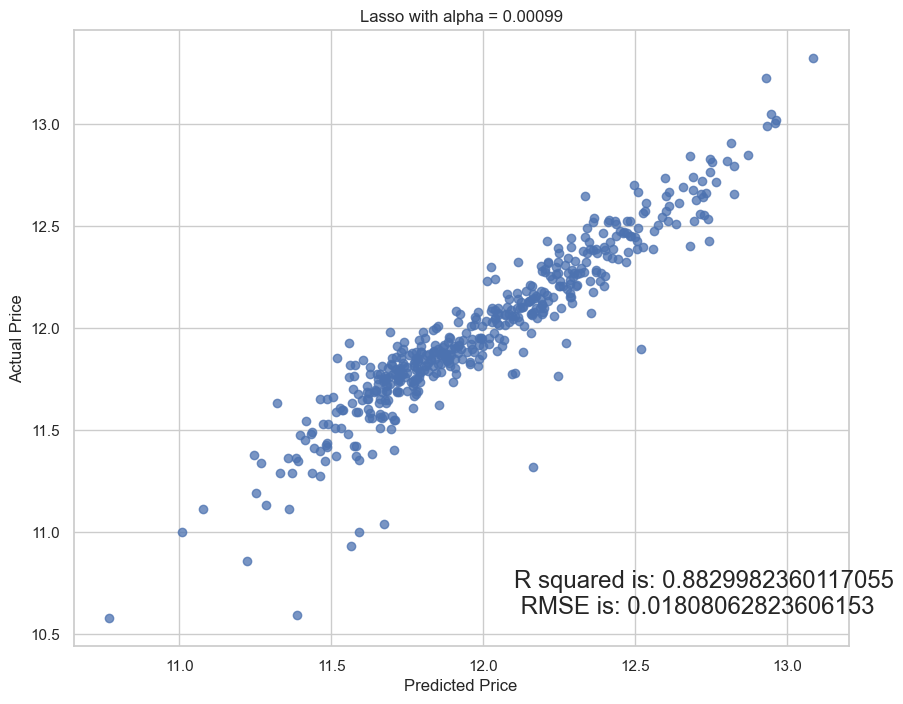

In [67]:

#C. Lasso Regression
alpha = 0.00099
lasso = Lasso(alpha=alpha, max_iter=50000)
lasso_model= lasso.fit(X_train,y_train)
print("Training - R squared is: \n", lasso_model.score(X_test,y_test))
preds_lasso=lasso_model.predict(X_test)
print("Training - RMSE is: \n", mean_squared_error(y_test,preds_lasso))
plt.scatter(preds_lasso,actual_values,alpha=.75,color="b")
plt.xlabel("Predicted Price")
plt.ylabel("Actual Price")
plt.title("Lasso with alpha = {}".format(alpha))
overlay="R squared is: {}\n RMSE is: {}".format(
lasso_model.score(X_test,y_test),
mean_squared_error(y_test,preds_lasso))
plt.annotate(text=overlay,xy=(12.1,10.6),size="x-large")
plt.show()

[16:32:57] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Training - R squared is: 
 0.8948470853744666
Training - RMSE is: 
 0.01624959054012892


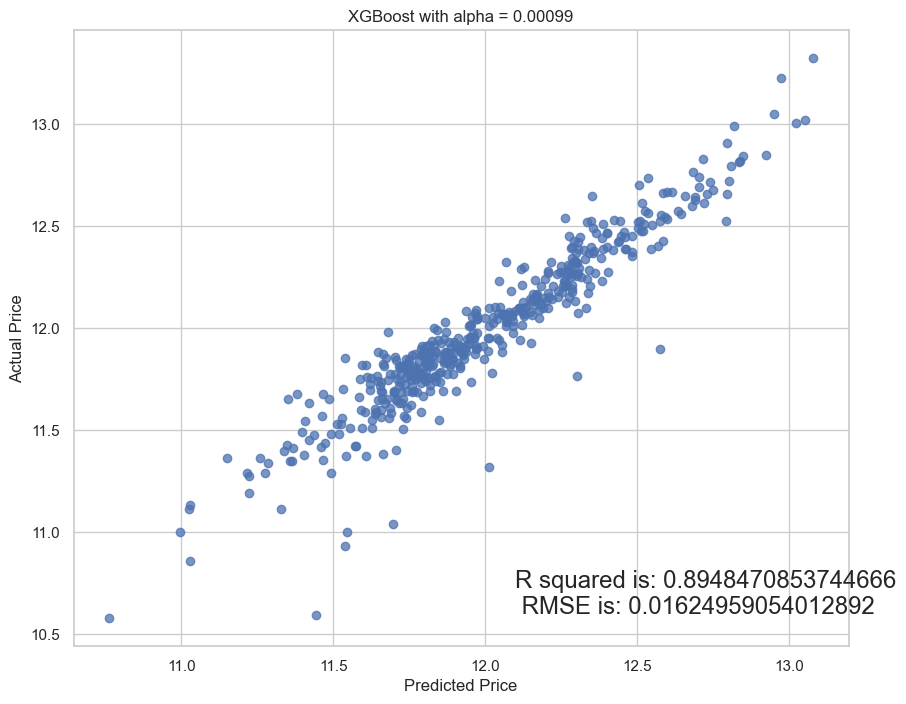

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1452, dtype: int64

In [69]:
#D. XGBoost
regr = xgb.XGBRegressor(colsample_bytree=0.2,
                       gamma=0.0,
                       learning_rate=0.05,
                       max_depth=6,
                       min_child_weight=1.5,
                       n_estimators=7200,
                       reg_alpha=0.9,
                       reg_lambda=0.6,
                       subsample=0.2,
                       seed=42,
                       silent=1)

xgb_model= regr.fit(X_train,y_train)
print("Training - R squared is: \n", xgb_model.score(X_test,y_test))
preds_xgb=xgb_model.predict(X_test)
print("Training - RMSE is: \n", mean_squared_error(y_test,preds_xgb))
plt.scatter(preds_xgb,actual_values,alpha=.75,color="b")
plt.xlabel("Predicted Price")
plt.ylabel("Actual Price")
plt.title("XGBoost with alpha = {}".format(alpha))
overlay="R squared is: {}\n RMSE is: {}".format(
xgb_model.score(X_test,y_test),
mean_squared_error(y_test,preds_xgb))
plt.annotate(text=overlay,xy=(12.1,10.6),size="x-large")
plt.show()

pd.DataFrame(preds_xgb.flatten())
train['SalePrice']
